In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [3]:
from networks import alex_cifar10

branchyNet = alex_cifar10.get_network()
branchyNet.to_gpu()
branchyNet.training()

Import Data

In [3]:
from datasets import mnist, pcifar10
x_train, y_train, x_test, y_test = pcifar10.get_data()

Settings

In [4]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 128
TRAIN_NUM_EPOCHS = 50

Train Main Network

In [ ]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

Train BranchyNet

In [ ]:
TRAIN_NUM_EPOCHS = 100
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                                   num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

Visualizing Network Training

In [ ]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

In [ ]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Get exit result, compute openmax vs softmax

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import dill
with open("_models/alexnet_cifar10.bn", "rb") as f:
    branchyNet = dill.load(f)

In [6]:
from datasets import mnist, pcifar10
x_train, y_train, x_test, y_test = pcifar10.get_data()

Model:  0
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


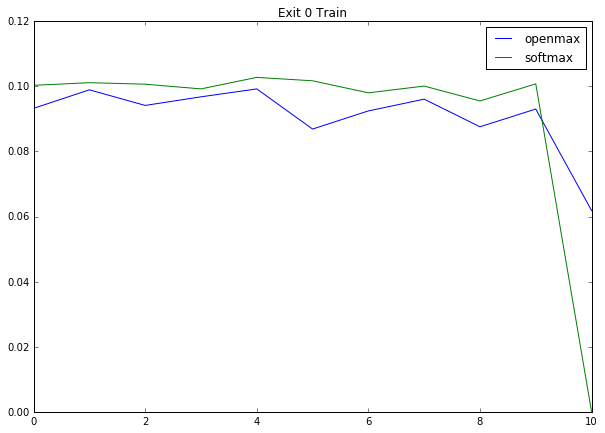

[ 0.09322916  0.09891703  0.09412273  0.09676459  0.09919837  0.08686758
  0.09243738  0.09604601  0.08756302  0.09301229  0.06184184]
[ 0.10031057  0.10110507  0.10064939  0.09920548  0.10273846  0.10169179
  0.09799269  0.10006881  0.09548932  0.10074843  0.        ]


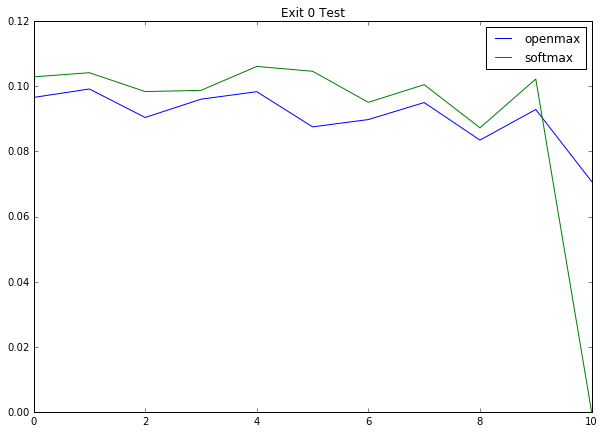

[ 0.0965736   0.09917527  0.09041843  0.09603701  0.09834615  0.08753531
  0.08978335  0.09500695  0.08347024  0.09287831  0.07077538]
[ 0.10290005  0.10417754  0.09837793  0.09875129  0.10610743  0.10462138
  0.09507992  0.10050238  0.08724719  0.1022349   0.        ]
om_train 50000
Softmax Test Acc:  0.7529
Openmax Test Acc:  0.769519922672
Openmax Unsure Test Acc:  0.528301886792
Number Unsure:  689
Model:  1
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


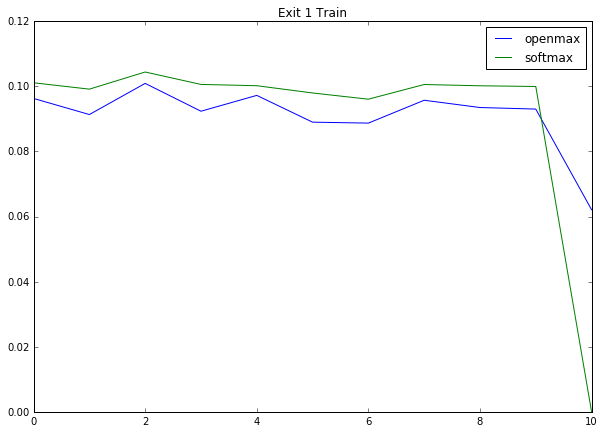

[ 0.09626689  0.09132385  0.10089452  0.09234539  0.09720778  0.08898199
  0.08869495  0.09571335  0.09348097  0.0930041   0.06208622]
[ 0.1010813   0.09912566  0.10439359  0.10057048  0.10018132  0.09795094
  0.09604137  0.10054961  0.10016118  0.09994455  0.        ]


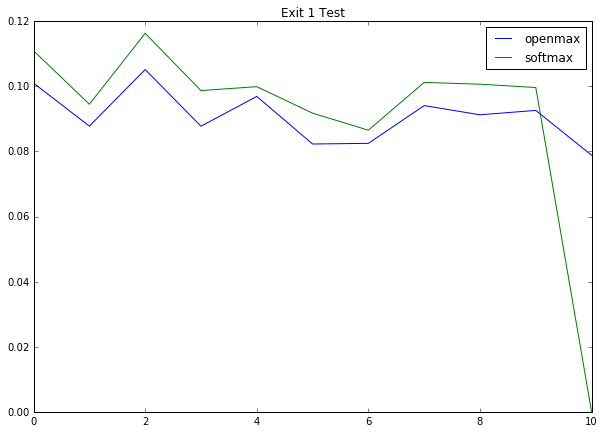

[ 0.10097867  0.0877618   0.10514443  0.08774039  0.09688795  0.08226981
  0.08247259  0.0940751   0.09124667  0.09259398  0.07882862]
[ 0.11091496  0.09449294  0.11627231  0.09868658  0.09988922  0.09175303
  0.08651755  0.10119912  0.10064695  0.09962734  0.        ]
om_train 50000
Softmax Test Acc:  0.7628
Openmax Test Acc:  0.778596187175
Openmax Unsure Test Acc:  0.572916666667
Number Unsure:  768
Model:  2
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


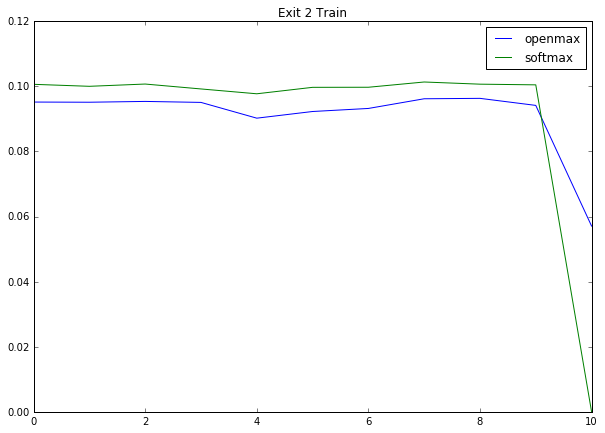

[ 0.09516064  0.09510571  0.0953555   0.09505166  0.09021016  0.09225743
  0.09319561  0.09616987  0.0962962   0.09413331  0.05706392]
[ 0.10060842  0.09999735  0.1006941   0.09918663  0.09770251  0.09968147
  0.09970775  0.10132124  0.10065385  0.10044666  0.        ]


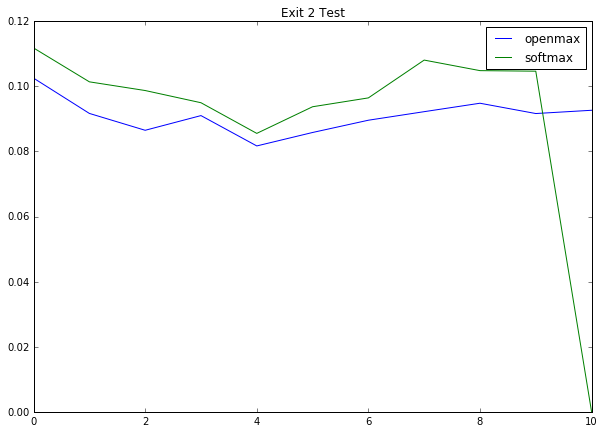

[ 0.10250531  0.09166529  0.08648777  0.09100079  0.08167922  0.08581053
  0.0895797   0.09220556  0.09479848  0.09163305  0.0926343 ]
[ 0.11177377  0.10137199  0.09870146  0.09495171  0.08553474  0.09371791
  0.09643874  0.10805352  0.1048138   0.10464236  0.        ]
om_train 50000
Softmax Test Acc:  0.7773
Openmax Test Acc:  0.785440192961
Openmax Unsure Test Acc:  0.692832764505
Number Unsure:  879


NameError: name 'plt' is not defined

In [13]:
import scipy as sp
from sklearn.metrics import accuracy_score
import scipy as sp


branchyNet.testing()
branchyNet.to_cpu()

from openmax.openmax import OpenMax, get_openmax_scores, plot_openmax_mean, expand_dims

tr_size = 2500
batch_size = 1000

softmax_train_layers, openmax_train_layers = [], []
softmax_test_layers, openmax_test_layers = [], []
openmax_fits = []
for i, model in enumerate(branchyNet.models):
    print 'Model: ', i
    tr_idxs = np.random.permutation(len(x_train))[:tr_size]
    features_train = expand_dims(model.test(x_train[tr_idxs]).data)
    
    #fit openmax
    openmax = OpenMax(tailsize=40, distance_type="eucos", alpharank=1)
    openmax.fit(features_train, y_train[tr_idxs])
    openmax_fits.append(openmax)

    #Get training softmax/openmax
    openmax_vs_train, softmax_vs_train = [], []
    for j in xrange(0, len(x_train), batch_size):
        print len(openmax_vs_train)
        features_train = expand_dims(model.test(x_train[j:j+batch_size]).data)
        o_train, s_train = get_openmax_scores(features_train, openmax)
        openmax_vs_train.extend(o_train)
        softmax_vs_train.extend(s_train)
    
    #Get test softmax/openmax
    openmax_vs_test, softmax_vs_test = [], []
    for j in xrange(0, len(x_test), batch_size):
        print len(openmax_vs_test)
        features_test = expand_dims(model.test(x_test[j:j+batch_size]).data)
        o_test, s_test = get_openmax_scores(features_test, openmax)
        openmax_vs_test.extend(o_test)
        softmax_vs_test.extend(s_test)

    #plot training
    softmax_vs_train = np.array(softmax_vs_train)
    openmax_vs_train =  np.array(openmax_vs_train)
    plot_openmax_mean(openmax_vs_train, softmax_vs_train, title='Exit {} Train'.format(i))   
    
    #plot test
    softmax_vs_test = np.array(softmax_vs_test)
    openmax_vs_test = np.array(openmax_vs_test)
    plot_openmax_mean(openmax_vs_test, softmax_vs_test, title='Exit {} Test'.format(i))
    
    #append for output
    print 'om_train', len(openmax_vs_train)
    softmax_train_layers.append(softmax_vs_train)
    softmax_test_layers.append(softmax_vs_test)
    openmax_train_layers.append(openmax_vs_train)
    openmax_test_layers.append(openmax_vs_test)
       
    #compute stats
    y_hat_t = np.argmax(softmax_vs_test, axis=1)
    print 'Softmax Test Acc: ', accuracy_score(y_test, y_hat_t)

    y_hat_t = np.argmax(openmax_vs_test, axis=1)
    unsure_idxs = y_hat_t==10
    y_hat_t = np.argmax(softmax_vs_test, axis=1)

    print 'Openmax Test Acc: ', accuracy_score(y_test[~unsure_idxs], y_hat_t[~unsure_idxs])
    print 'Openmax Unsure Test Acc: ', accuracy_score(y_test[unsure_idxs], y_hat_t[unsure_idxs])
    print 'Number Unsure: ', np.sum(unsure_idxs)



#plot entropy
plt.figure(figsize=(10,7))
plt.plot(softmax_ents, label='softmax')
plt.plot(openmax_ents, label='softmax(filtered)')
plt.xlabel('exit #')
plt.xticks([0, 1, 2])
plt.ylabel('mean entropy')
plt.legend()
plt.show()

In [24]:
def meta_model_labels(y_true, softmax_vs):
    '''
    Generates labels for each branch.
    '''
    #get last layer predicitons
    y_hat_last = np.argmax(softmax_vs[-1], axis=1)
    last_correct = y_hat_last == y_true
    
    layer_labels = []
    for s_vs in softmax_vs[:-1]:
        layer_label = np.zeros(len(y_true))
        y_hat = np.argmax(s_vs, axis=1)
        correct = y_hat == y_true
            
        #1 = exit
        layer_label[correct] = 1
        
        #2 = continue
        layer_label[~correct] = 2
        
        #0 = drop
        layer_label[~correct & ~last_correct] = 0
        
        layer_labels.append(layer_label)
    
    return np.array(layer_labels).astype(int)

In [43]:
meta_train_y = meta_model_labels(y_train, openmax_train_layers)
meta_test_y = meta_model_labels(y_test, openmax_test_layers)

In [71]:
from networks.mlp import MLP
import chainer
import chainer.links as L
from chainer import training
from chainer.training import extensions


def train_metamodel(train, test, num_classes, nodes=100, batchsize=256, epochs=30):
    model = L.Classifier(MLP(len(train[0][0]), nodes, num_classes))
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(model)

    train_iter = chainer.iterators.SerialIterator(train, batchsize)
    test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

    # Set up a trainer
    updater = training.StandardUpdater(train_iter, optimizer, device=-1)
    trainer = training.Trainer(updater, (epochs, 'epoch'), out='result')

    # Evaluate the model with the test dataset for each epoch
    trainer.extend(extensions.Evaluator(test_iter, model, device=-1))

    # Dump a computational graph from 'loss' variable at the first iteration
    # The "main" refers to the target link of the "main" optimizer.
    trainer.extend(extensions.dump_graph('main/loss'))

    # Take a snapshot at each epoch
    trainer.extend(extensions.snapshot(), trigger=(epochs, 'epoch'))

    # Write a log of evaluation statistics for each epoch
    trainer.extend(extensions.LogReport())

    # Print selected entries of the log to stdout
    # Here "main" refers to the target link of the "main" optimizer again, and
    # "validation" refers to the default name of the Evaluator extension.
    # Entries other than 'epoch' are reported by the Classifier link, called by
    # either the updater or the evaluator.
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'validation/main/loss',
         'main/accuracy', 'validation/main/accuracy']))

    # Print a progress bar to stdout
    trainer.extend(extensions.ProgressBar())

    # Run the training
    trainer.run()
    
    return model

In [73]:
meta_train = zip(openmax_train_layers[0].astype(np.float32), meta_train_y[0])
meta_test = zip(openmax_test_layers[0].astype(np.float32), meta_test_y[0])
meta_model0 = train_metamodel(meta_train, meta_test, 3, epochs=3)

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
     total [########..........................................] 17.07%
this epoch [#########################.........................] 51.20%
       100 iter, 0 epoch / 3 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
1           0.23695     1.0965                0.940031       0.736035                  
     total [#################.................................] 34.13%
this epoch [#.................................................]  2.40%
       200 iter, 1 epoch / 3 epochs
    260.42 iters/sec. Estimated time to finish: 0:00:01.482000.
     total [#########################.........................] 51.20%
this epoch [##########################........................] 53.60%
       300 iter, 1 epoch / 3 epochs
       271 iters/sec. Estimated time to finish: 0:00:01.055110.
2           0.162126    1.10343               0.950781       0.736035                  
     total [#######

In [77]:
y_pred = meta_model0.predictor(openmax_test_layers[0].astype(np.float32)).data

In [80]:
np.bincount(np.argmax(y_pred,axis=1))

array([   0, 9052,  948], dtype=int64)

In [82]:
np.bincount(meta_test_y[0])

array([1699, 7039, 1262], dtype=int64)

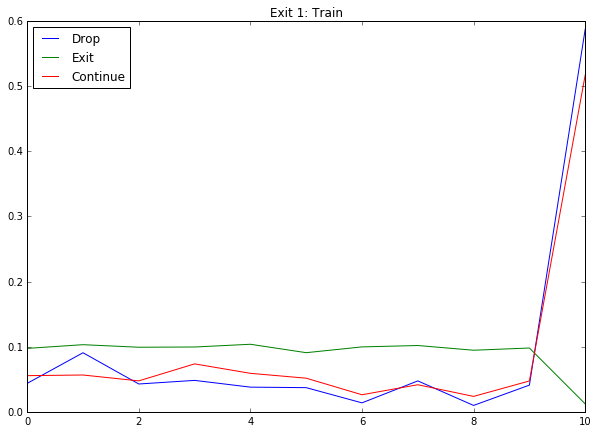

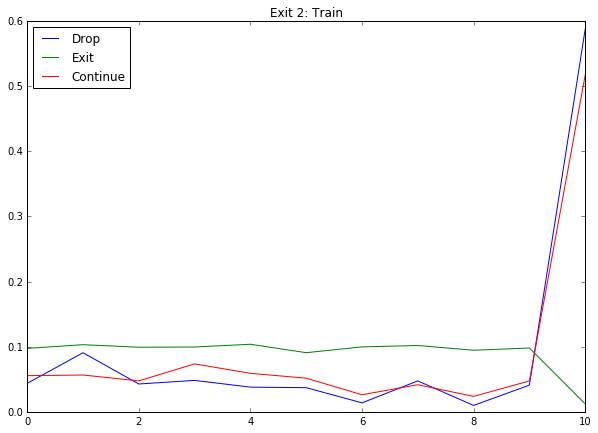

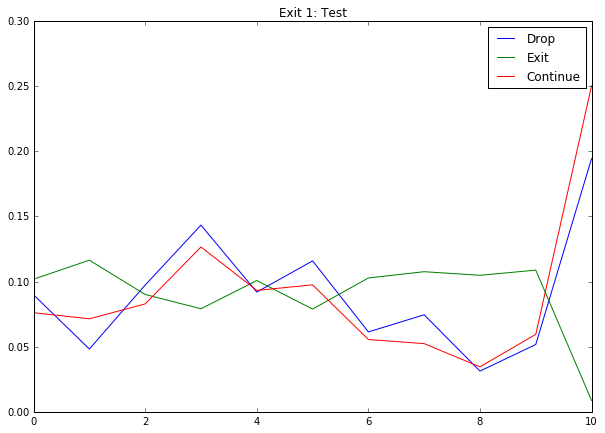

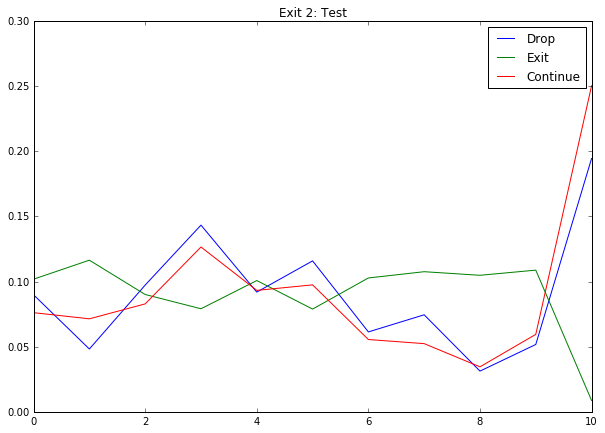

In [103]:
import matplotlib.pyplot as plt

def plot_exitpoint_label_dist(x, y, exit_num, title=''):
    plt.figure(figsize=[10,7])
    if title:
        plt.title(title)
    plt.plot(np.mean(x[exitp][y[exitp]==0], axis=0), label='Drop')
    plt.plot(np.mean(x[exitp][y[exitp]==1], axis=0), label='Exit')
    plt.plot(np.mean(x[exitp][y[exitp]==2], axis=0), label='Continue')
    plt.legend(loc=0)
    plt.show()

plot_exitpoint_label_dist(openmax_train_layers, meta_train_y, 0, title='Exit 1: Train')
plot_exitpoint_label_dist(openmax_train_layers, meta_train_y, 1, title='Exit 2: Train')
plot_exitpoint_label_dist(openmax_test_layers, meta_test_y, 0, title='Exit 1: Test')
plot_exitpoint_label_dist(openmax_test_layers, meta_test_y, 1, title='Exit 2: Test')

In [90]:
np.where(meta_test_y == 0)[0]

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
meta_test_y.s

array([[1, 2, 1, ..., 1, 2, 1],
       [1, 1, 1, ..., 1, 2, 1]])